# Imports


In [ ]:
## Import needed packages and modules from library
## Basics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## NLP
import os
import itertools
from collections import Counter
import re
import string

import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','punkt','wordnet'])

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

## Models Creation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

import statsmodels.api as sm
import statsmodels.tools 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Dataset I
animeI = pd.read_csv('animes.csv')
profile = pd.read_csv('profiles.csv')
review = pd.read_csv('reviews.csv')
# Dataset II
animeII = pd.read_csv('anime.csv')
synopsis = pd.read_csv('anime_with_synopsis.csv')
animelist = pd.read_csv('animelist.csv')
status = pd.read_csv('watching_status.csv')

#EDA & Pre-processing

##EDA (1)

In [ ]:
# Have a look of all datasets
animeI.head(3)

uid  ...                                               link
0  28891  ...  https://myanimelist.net/anime/28891/Haikyuu_Se...
1  23273  ...  https://myanimelist.net/anime/23273/Shigatsu_w...
2  34599  ...  https://myanimelist.net/anime/34599/Made_in_Abyss

[3 rows x 12 columns]

In [ ]:
profile.head(3)

profile  ...                                            link
0  DesolatePsyche  ...  https://myanimelist.net/profile/DesolatePsyche
1       baekbeans  ...       https://myanimelist.net/profile/baekbeans
2            skrn  ...            https://myanimelist.net/profile/skrn

[3 rows x 5 columns]

In [ ]:
review.head(3)

uid  ...                                           link
0  255938  ...  https://myanimelist.net/reviews.php?id=255938
1  259117  ...  https://myanimelist.net/reviews.php?id=259117
2  253664  ...  https://myanimelist.net/reviews.php?id=253664

[3 rows x 7 columns]

In [ ]:
animeII.head(3)

MAL_ID                             Name Score  ... Score-3 Score-2 Score-1
0       1                     Cowboy Bebop  8.78  ...  1357.0   741.0  1580.0
1       5  Cowboy Bebop: Tengoku no Tobira  8.39  ...   221.0   109.0   379.0
2       6                           Trigun  8.24  ...   664.0   316.0   533.0

[3 rows x 35 columns]

In [ ]:
synopsis.head(3)

MAL_ID  ...                                          sypnopsis
0       1  ...  In the year 2071, humanity has colonized sever...
1       5  ...  other day, another bounty—such is the life of ...
2       6  ...  Vash the Stampede is the man with a $$60,000,0...

[3 rows x 5 columns]

In [ ]:
animelist.head(3)

user_id  anime_id  rating  watching_status  watched_episodes
0        0        67       9                1                 1
1        0      6702       7                1                 4
2        0       242      10                1                 4

In [ ]:
rating.head(3)

user_id  anime_id  rating
0        0       430       9
1        0      1004       5
2        0      3010       7

In [ ]:
status.head(3)

## not interested in the ratings made before the completion of an anime nor the individual user info
## so profiles, animelist and status are not to be used

status         description
0       1  Currently Watching
1       2           Completed
2       3             On Hold

In [ ]:
# Check shapes of dataset
useful = [animeI, review, animeII, synopsis, rating]
useful_str = ['animeI', 'review', 'animeII', 'synopsis', 'rating']
for i in range(5):
  print(useful_str[i]+':', useful[i].shape, sep=' ',end='\n')

animeI: (19311, 12)
review: (192112, 7)
animeII: (17562, 35)
synopsis: (16214, 5)
rating: (57633278, 3)


In [ ]:
# Check info of dataset
for i in range(5):
  print(useful_str[i]+':', useful[i].info(), sep=' ', end='\n\n\n------------\n\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB
animeI: None


------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192112 entries, 0 to 192111
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        192112 non-null  in

In [ ]:
# Check metrics of dataset
for i in range(5):
  print(useful_str[i]+':', useful[i].describe(), sep=' ', end='\n\n\n------------\n\n\n')

animeI:                 uid      episodes  ...        ranked         score
count  19311.000000  18605.000000  ...  16099.000000  18732.000000
mean   19358.904096     11.460414  ...   6866.524194      6.436107
std    14271.446515     47.950386  ...   4390.018768      1.007941
min        1.000000      1.000000  ...      1.000000      1.250000
25%     4833.500000      1.000000  ...   2895.500000      5.770000
50%    18327.000000      2.000000  ...   6963.000000      6.410000
75%    33896.500000     12.000000  ...  10601.500000      7.150000
max    40960.000000   3057.000000  ...  14675.000000      9.230000

[8 rows x 6 columns]


------------


review:                  uid      anime_uid          score
count  192112.000000  192112.000000  192112.000000
mean   187648.127525   15273.300283       7.570235
std     98748.902397   13480.565379       2.255167
min         1.000000       1.000000       0.000000
25%    101779.500000    2167.000000       6.000000
50%    210913.500000   10793.000000 

##Data Cleaning

###Anime Dataset

####initial cleaning for NLP

In [ ]:
# Since both datasets were scraped from MAL
# they should share sane Anime ID
# but let's double check
animeI.sort_values(by='uid').head(15)

## it appears that animeI has dupilcates

uid  ...                                               link
18062    1  ...       https://myanimelist.net/anime/1/Cowboy_Bebop
764      1  ...       https://myanimelist.net/anime/1/Cowboy_Bebop
15230    5  ...  https://myanimelist.net/anime/5/Cowboy_Bebop__...
644      5  ...  https://myanimelist.net/anime/5/Cowboy_Bebop__...
10534    6  ...             https://myanimelist.net/anime/6/Trigun
542      6  ...             https://myanimelist.net/anime/6/Trigun
17939    7  ...  https://myanimelist.net/anime/7/Witch_Hunter_R...
5624     8  ...     https://myanimelist.net/anime/8/Bouken_Ou_Beet
5769    15  ...      https://myanimelist.net/anime/15/Eyeshield_21
268     15  ...      https://myanimelist.net/anime/15/Eyeshield_21
366     16  ...  https://myanimelist.net/anime/16/Hachimitsu_to...
6499    16  ...  https://myanimelist.net/anime/16/Hachimitsu_to...
5297    17  ...  https://myanimelist.net/anime/17/Hungry_Heart_...
8626    18  ...  https://myanimelist.net/anime/18/Initial_D_Fou...
466     18  ...  https://myanimelist.net/anime/18/Initial_D_Fou...

[15 rows x 12 columns]

In [ ]:
# Drop animeI's duplicates

animeI = animeI.drop_duplicates()
animeI.shape

(16368, 12)

In [ ]:
animeII.sort_values(by='MAL_ID').head(10)

## they do indeed share same anime ID

In [ ]:
# Compare their columns
print(animeI.columns, animeII.columns, sep='\n\n')

## animeII includes all animeI's columns apart from synopsis
## but there is an synopsis dataset available
## so animeII is chosen to be the Anime dataset

Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype='object')

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')


In [ ]:
# Extract the Anime ID and the respective synopsis
# fix spelling mistake
synopsis = synopsis.drop(columns=['Name','Score','Genres'])
synopsis.columns = ['MAL_ID','Synopsis']

# Merge the dataframes animeII and synopsis together
anime = animeII.merge(synopsis,how='outer',on='MAL_ID')
anime.head()

MAL_ID  ...                                           Synopsis
0       1  ...  In the year 2071, humanity has colonized sever...
1       5  ...  other day, another bounty—such is the life of ...
2       6  ...  Vash the Stampede is the man with a $$60,000,0...
3       7  ...  ches are individuals with special powers like ...
4       8  ...  It is the dark century and the people are suff...

[5 rows x 36 columns]

In [ ]:
# Check the null values
anime.isnull().sum()

MAL_ID              0
Name                0
Score               0
Genres              0
English name        0
Japanese name       0
Type                0
Episodes            0
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked              0
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
Plan to Watch       0
Score-10            0
Score-9             0
Score-8             0
Score-7             0
Score-6             0
Score-5             0
Score-4             0
Score-3             0
Score-2             0
Score-1             0
Synopsis         1356
dtype: int64

In [ ]:
# Investigate the null values in Synopsis column
anime[anime['Synopsis'].isnull()==True]

## Mostly the inappropriate entries
## these needs to be removed

MAL_ID  ... Synopsis
165       188  ...      NaN
180       203  ...      NaN
188       211  ...      NaN
190       213  ...      NaN
191       214  ...      NaN
...       ...  ...      ...
17366   44211  ...      NaN
17403   44848  ...      NaN
17457   45731  ...      NaN
17467   46095  ...      NaN
17545   48422  ...      NaN

[1356 rows x 36 columns]

In [ ]:
# Get rid of the inappropriate entries
to_drop=[]
notwanted = anime['Genres'].str.contains('Hentai',case=False,regex=False)

for i in range(len(notwanted)):
  if notwanted.iloc[i] == True:
    to_drop.append(i)

anime = anime.drop(to_drop)
anime.reset_index(drop=True, inplace=True)

In [ ]:
# Look up the types
anime.Type.value_counts()

## not interested in the music entries

TV         4996
Movie      3031
OVA        2600
Special    2195
ONA        1886
Music      1469
Unknown      37
Name: Type, dtype: int64

In [ ]:
# Drop music types
to_drop=[]
for i in range(len(anime)):
  if anime['Type'][i] == 'Music':
    to_drop.append(i)
anime = anime.drop(to_drop)
anime.reset_index(drop=True, inplace=True)

# Look at the nulls again
anime['Synopsis'].isnull().sum()


8

In [ ]:
# Remove the Synopsis nulls
anime.dropna(inplace=True)
anime.reset_index(drop=True, inplace=True)
## this dataset is now ready to run NLP analysis

####change data types

In [ ]:
# Check datatypes
anime.dtypes

MAL_ID            int64
Name             object
Score            object
Genres           object
English name     object
Japanese name    object
Type             object
Episodes         object
Aired            object
Premiered        object
Producers        object
Licensors        object
Studios          object
Source           object
Duration         object
Rating           object
Ranked           object
Popularity        int64
Members           int64
Favorites         int64
Watching          int64
Completed         int64
On-Hold           int64
Dropped           int64
Plan to Watch     int64
Score-10         object
Score-9          object
Score-8          object
Score-7          object
Score-6          object
Score-5          object
Score-4          object
Score-3          object
Score-2          object
Score-1          object
Synopsis         object
dtype: object

In [ ]:
# Convert the numeric data from string to float
for x in ['Score','Episodes','Ranked','Score-10','Score-9','Score-8','Score-7','Score-6','Score-5','Score-4','Score-3','Score-2','Score-1']:
  anime[x] = anime[x].apply(pd.to_numeric, errors='coerce')

####time

In [ ]:
# Check details of 'Premiered' column
anime.Premiered.value_counts()

Unknown        9997
Spring 2017      86
Fall 2016        79
Spring 2018      77
Spring 2016      74
               ... 
Summer 1964       1
Summer 1962       1
Summer 1991       1
Spring 1964       1
Summer 1967       1
Name: Premiered, Length: 231, dtype: int64

In [ ]:
# Check details of 'Aired' column
anime.Aired.value_counts()

Unknown                         303
2005                             54
2021 to ?                        46
2004                             43
2006                             41
                               ... 
Oct 7, 1971 to Sep 28, 1972       1
Aug 4, 2010                       1
Jul 7, 2003 to Sep 29, 2003       1
Feb 25, 1999 to Jul 25, 1999      1
Jan 10, 2011 to 2017              1
Name: Aired, Length: 10160, dtype: int64

In [ ]:
# Combine Premiered and Aired
anime.reset_index(drop=True, inplace=True)

for x in range(len(anime)):
  
  if anime['Premiered'][x] == 'Unknown':
    anime['Premiered'][x] = anime['Aired'][x]
    if anime['Premiered'][x][0] == '1' or anime['Premiered'][x][0] == '2':
      anime['Premiered'][x] = int(anime['Premiered'][x][:5])
    elif anime['Premiered'][x][5] == ',':
      anime['Premiered'][x] = int(anime['Premiered'][x][7:11])
    elif anime['Premiered'][x][6] == ',':
      anime['Premiered'][x] = int(anime['Premiered'][x][8:12])
    elif anime['Premiered'][x][3] == ',':
      anime['Premiered'][x] = int(anime['Premiered'][x][5:9])
    else:
      anime['Premiered'][x] = 0

  else:
    anime['Premiered'][x] = int(anime['Premiered'][x][-4:])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipy

In [ ]:
# Drop Aired now they are merged
anime.drop(columns='Aired', inplace=True)

# Change the premiered year to how many years ago from now
anime['Premiered'] = anime['Premiered'].apply(lambda x: 2021-x)

In [ ]:
# Check details of 'Duration' column
anime.Duration.value_counts()

24 min. per ep.    1713
23 min. per ep.    1058
25 min. per ep.     827
Unknown             539
3 min. per ep.      403
                   ... 
2 hr. 28 min.         1
2 hr. 19 min.         1
22 sec.               1
2 hr. 43 min.         1
2 hr. 40 min.         1
Name: Duration, Length: 313, dtype: int64

In [ ]:
# Fix Duration with stripping/converting it back to mins per episode
for x in range(len(anime)):
  if anime['Duration'][x][-3:] == 'ep.':
    anime['Duration'][x] = anime['Duration'][x][:-8]

  if anime['Duration'][x][-4:] == 'sec.':
    anime['Duration'][x] = round(int(anime['Duration'][x][:-5])/60,2)

  elif anime['Duration'][x][2:5] == 'hr.' and anime['Duration'][x][-4:] == 'min.':
    anime['Duration'][x] = int(anime['Duration'][x][0])*60 + int(anime['Duration'][x][6:8])

  elif anime['Duration'][x][-3:] == 'hr.':
    anime['Duration'][x] = int(anime['Duration'][x][0])*60

  elif anime['Duration'][x][-4:] == 'min.':
    anime['Duration'][x] = int(anime['Duration'][x][:2])
  
  elif anime['Duration'][x] == 'Unknown':
    anime['Duration'][x] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we loa

####nulls

In [ ]:
# Check nulls
anime.isnull().sum()

MAL_ID              0
Name                0
Score            4377
Genres              0
English name        0
Japanese name       0
Type                0
Episodes          471
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked            410
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
Plan to Watch       0
Score-10          411
Score-9          2558
Score-8          1326
Score-7           477
Score-6           502
Score-5           575
Score-4           955
Score-3          1238
Score-2          1448
Score-1           444
Synopsis            0
dtype: int64

In [ ]:
# Let's see whether the other animeI could help us to fill in the nulls for score
to_join = animeI[['uid','score']]
to_join.columns = ['MAL_ID','ScoreI']
anime = anime.join(to_join,how='left',on='MAL_ID',rsuffix='_animeI')

# Fill the nulls with the scores from the AnimeI dataset
anime['SCORE'] = anime['Score'].copy()
anime['SCORE'].fillna(anime['ScoreI'], inplace=True)
anime['SCORE'].isnull().sum()

3701

In [ ]:
# Try to impute the missing values for Score
nulls = list(anime[anime['SCORE'].isnull()]['MAL_ID'])
to_check = rating[['anime_id','rating']].groupby('anime_id').mean()
to_check = to_check.loc[to_check.index.isin(nulls)]
anime.set_index('MAL_ID', inplace=True)

for i in nulls:
  try:
    anime['SCORE'][i] = round(to_check['rating'][i],2)
  except:
    anime['SCORE'][i] = anime['SCORE'][i]

anime.reset_index(inplace=True)
anime.rename({'index':'MAL_ID'},inplace=True)
anime['SCORE'].isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


553

In [ ]:
# Now fixing the episode nulls
epi = pd.DataFrame(anime.loc[anime['Episodes'].isnull()])
epi.reset_index(inplace=True)


for x in epi['index']:
  if anime['Premiered'][x] < 2000:
    anime['Episodes'][x] = 100
  elif 2000 <= anime['Premiered'][x] < 2010:
     anime['Episodes'][x] = 500
  elif 2010 <= anime['Premiered'][x] < 2015:
     anime['Episodes'][x] = 50
  elif 2015 <= anime['Premiered'][x] <= 2021:
    anime['Episodes'][x] = 25


anime['Episodes'].isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0

In [ ]:
# Drop the nulls in SCORE as there is no way to retrieve all of them within time constraint 
anime = anime.dropna(subset=['SCORE'])
anime.reset_index(drop=True, inplace=True)

# Drop the names as we just want the id, 
#also the newly created columns that has no use anymore
anime.drop(columns=['Name','English name','Japanese name','Score','MAL_ID_animeI','ScoreI'],inplace=True)
anime.rename(columns={'SCORE':'Score'},inplace=True)
anime.shape

MAL_ID  ... Score
0       1  ...  8.78
1       5  ...  8.39
2       6  ...  8.24

[3 rows x 32 columns]

###Reviews Dataset

In [ ]:
# Have a look at the text
review.iloc[5143,3]

'\n           \n         \n           \n             \n           \n         \n         \n           more pics \n         \n       \n         \n       \n         \n           Overall \n           9 \n         \n         \n           Story \n           8 \n         \n                   \n             Animation \n             10 \n           \n           \n             Sound \n             10 \n           \n                 \n           Character \n           10 \n         \n         \n           Enjoyment \n           9 \n         \n       \n     \n\n                    \n    From up on Poppy Hill, another great addition to the Ghibli Studio collection in my opinion. Let me start off by saying that what attracts me to to any work associated with Hayao Miyazaki is the element of magic, creative settings and unforgettable characters. Even Tales of EarthSea, directed by Goro Miyazaki (same director for this movie) had some of these elements...however, you wont necessarily find that when yo

In [ ]:
# Clean the leading and trailing spaces and the link column
review = review.drop(columns=['link'])
dict1 = {'\n         ':'','\d':''}
dict2 = {'\n':'','\r':''}
review['text'].replace(dict1,inplace=True,regex=True)
review['text'].replace(dict2,inplace=True,regex=True)

review.iloc[5143,3]

'            more pics                 Overall      Story                  Animation              Sound                  Character      Enjoyment                               From up on Poppy Hill, another great addition to the Ghibli Studio collection in my opinion. Let me start off by saying that what attracts me to to any work associated with Hayao Miyazaki is the element of magic, creative settings and unforgettable characters. Even Tales of EarthSea, directed by Goro Miyazaki (same director for this movie) had some of these elements...however, you wont necessarily find that when you watch From up on Poppy Hill.   Story /  The story is about family, love and determination. I found that each of these elements were strongly portrayed throughout movie by the two main characters and in the end these elements brought the characters together. The symbolic themes such as the flags, the photographs and the club house are shown many times and tie major elements together.Though these elemen

In [ ]:
# Check the leading and trailing format that gives no individual values
leading = '            more pics        Overall      Story                  Animation              Sound                  Character      Enjoyment                      '
trailing = 'Helpful          '
print(len(leading),len(trailing))

157 17


In [ ]:
# Get rid of the unwanted parts of each entry
for i in range(len(review)):
  review['text'][i] = review['text'][i][157:]
  review['text'][i] = review['text'][i][:-17]
review.iloc[132,3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


"                  This is the type of Anime that you watch just because of how cute it is, and let me tell you, it's very cute.  The story is about a high school girl named 'Yui', who at first doesn't know anything about music, or guitars. She joins the Light Music Club in hopes of maybe finding something she can outlet to, and make some friends with; and it works out great!  Art and Sound are amazingly well done! It's not too over the top, but it's just right. And the OP is highly addictive!  Characters at first were a bit bland to me. But, as usual, I've grown to love them and their unique quirks that they offer through the show. The characters are really a highlight here.   Lastly, this anime may be a bit boring at first. But I assure you that it's well worth the watch! The characters are definitely memorable, and the OP is super addicting! I will be watching this one again.  Also, me, being someone who makes music and knows quite a bit about music theory, found this Anime to be ve

In [ ]:
# Check whether there is any duplicate, nulls and the data types
review.drop_duplicates(inplace=True)
review.reset_index(drop=True, inplace=True)
print(review.shape, review.isnull().sum(), review.dtypes, sep='\n\n')

## duplicates were dropped, everything seems fine
## it is ready for build model for NLP sentiment analysis

(130519, 6)

uid          0
profile      0
anime_uid    0
text         0
score        0
scores       0
dtype: int64

uid           int64
profile      object
anime_uid     int64
text         object
score         int64
scores       object
dtype: object

      uid  ...                                             scores
0  255938  ...  {'Overall': '8', 'Story': '8', 'Animation': '8...
1  259117  ...  {'Overall': '10', 'Story': '10', 'Animation': ...
2  253664  ...  {'Overall': '7', 'Story': '7', 'Animation': '9...

[3 rows x 6 columns]


##Feature Engineering

###NLP

####Feature engineer text data (synopsis and reviews)

In [ ]:
# Initialise the Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stpwrd = nltk.corpus.stopwords.words('english')

In [ ]:
# Build functions to clean and normalise text entry
''' Noralisation steps
1.pre tokenise cleaning
-lower case
-remove regex (number,contractions,special character)
-remove punctuction

2.tokenise

3.post tokenise cleaning
-lemmentise
-remove stopword'''

def clean(txt):
  to_remove = [r"n\'t",r"\'re",r"\'s",r"\'d",r"\'ll",r"\'t",r"\'ve",r"\'m",'[^a-z]+']
  for n in to_remove:
    txt = " ".join(re.sub(n, " ", txt).split())
  
  return txt
  
def normalise(txt):
  txt = txt.lower()
  txt = clean(txt)

  txt = word_tokenize(txt)

  txt = [lemmatizer.lemmatize(x) for x in txt]
  txt = [x for x in txt if x not in stpwrd]

  return txt

####Reviews (build model for synopsis sentiment analysis)

In [ ]:
# Check the max and min word count for anime synopsis
length=anime['MAL_ID'].copy()
cleaned=length.copy()
for x in range(len(length)):
  cleaned[x]=normalise(anime['Synopsis'][x])
  length[x]=len(cleaned[x])

print(length.min(),length.max(),sep='  ')

1  295


In [ ]:
# Clean up data, but then, join it back together so it's not tokenized.
cleaned_rev = [" ".join(normalise(x)) for x in review['text']]

# Vectorising our cleaned reviews (note that since the max of synopsis word is 295, we set max_features at 150)
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 150)
train_features = vectorizer.fit_transform(cleaned_rev)

# The vectoriser object is now fit on our data, so we can use it to obtain information such as feature names
vocab = vectorizer.get_feature_names() 

# The vectoriser stores the data in a sparse format, to work with it, we need to arrange it into an array
train_features = train_features.toarray()
train_features

array([[1, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 2, 1, 4],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 2, ..., 1, 1, 1]])

In [ ]:
# Create a new column to classify the score as negative vs positive
review['score_class'] = review['score'].copy()
for n in range(len(review)):
  if review['score'][n] < 5.5:
    review['score_class'][n] = 0
  else:
    review['score_class'][n] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Time to build a model to detect sentiment
X = train_features
y = review['score_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

In [ ]:
# We will use logistic regression as the model of our sentiment analytics
lr = LogisticRegression()
lr.fit(X_train, y_train)
output_train = lr.predict(X_train)

In [ ]:
# Metrics for train set
# they are accurancy, precision, recall, f-1 score and support respectively
print((lr.score(X_train, y_train)),(metrics.precision_recall_fscore_support(y_train,output_train,average='weighted')))

0.8297754154096634 (0.8116716489128956, 0.8297754154096634, 0.799455736963549, None)


In [ ]:
# Metrics for test set
# they are accurancy, precision, recall, f-1 score and support respectively
output_test = lr.predict(X_test)
print((lr.score(X_test, y_test)),(metrics.precision_recall_fscore_support(y_test,output_test,average='weighted')))

0.8338951884768618 (0.8177658603718786, 0.8338951884768618, 0.8040235014194081, None)


####Synopsis


#####sentiment


In [ ]:
# Clean up data, but then, join it back together so it's not tokenized.
cleaned_syn = [" ".join(normalise(x)) for x in anime['Synopsis']]

# Vectorising our cleaned reviews
train_features_syn = vectorizer.fit_transform(cleaned_syn)

# The vectoriser object is now fit on our data, so we can use it to obtain information such as feature names
vocab_syn = vectorizer.get_feature_names()

# The vectoriser stores the data in a sparse format, to work with it, we need to arrange it into an array
train_features_syn = train_features_syn.toarray()

In [ ]:
# Use the previous logistic model to predict synopsis sentiment
output_syn = lr.predict_proba(train_features_syn)

# Convert the output into a dataframe
output_syn = pd.DataFrame(output_syn,columns=['0','1'])
output_syn.head()

0         1
0  0.288526  0.711474
1  0.210038  0.789962
2  0.202199  0.797801
3  0.294566  0.705434
4  0.183945  0.816055

In [ ]:
# Append the probability of the synopsis being postive as the sentiment column
anime['synopsis_sentiment'] = output_syn['1']
anime.head()

MAL_ID  ... synopsis_sentiment
0       1  ...           0.711474
1       5  ...           0.789962
2       6  ...           0.797801
3       7  ...           0.705434
4       8  ...           0.816055

[5 rows x 33 columns]

#####tf-idf

In [ ]:
# Look at the TF-IDF and choose the most significant ones
tfIdfTransformer = TfidfTransformer(use_idf=True)
TfIdf_syn = tfIdfTransformer.fit_transform(train_features_syn)
tfidf_syn = pd.DataFrame(TfIdf_syn[0].T.todense(), index=vocab_syn, columns=["TF-IDF"])
tfidf_syn = tfidf_syn.sort_values('TF-IDF', ascending=False)

In [ ]:
# Here is the list of the top significant words and their TF-IDF score
tfidf_syn.head(22)

TF-IDF
planet      0.407004
little      0.377301
member      0.376704
space       0.206068
past        0.200877
living      0.200195
part        0.194481
strange     0.194057
well        0.192318
team        0.191592
adventure   0.188129
earth       0.177069
meet        0.175135
named       0.168613
make        0.165178
mysterious  0.163553
high        0.161199
two         0.150453
new         0.137587
year        0.136008
ha          0.109937
return      0.000000

In [ ]:
# Reset index to numeric values
tfidf_syn = tfidf_syn.reset_index()

# Generate a list of the 21 most significant words
word_list = list(tfidf_syn['index'][0:21])

In [ ]:
# Create a dataframe which shows how many times the significant has shown up in each synopsis
nlp_syn = pd.DataFrame(train_features_syn,columns=vocab_syn)
tfidf_col = nlp_syn[word_list]
tfidf_col[tfidf_col.columns[tfidf_col.columns.isin(word_list)]]
tfidf_col

planet  little  member  space  past  ...  high  two  new  year  ha
0           2       2       2      1     1  ...     1    1    1     1   1
1           0       0       0      0     0  ...     0    0    0     0   0
2           1       0       0      0     1  ...     0    1    0     0   0
3           0       0       0      0     0  ...     0    0    0     1   0
4           0       0       0      0     0  ...     0    0    0     1   0
...       ...     ...     ...    ...   ...  ...   ...  ...  ...   ...  ..
14179       0       0       0      0     0  ...     0    0    0     0   1
14180       0       0       0      0     0  ...     0    1    0     0   0
14181       0       0       0      0     0  ...     0    0    0     0   0
14182       0       0       0      0     0  ...     0    0    0     0   0
14183       0       0       0      0     0  ...     0    0    0     0   0

[14184 rows x 21 columns]

In [ ]:
# Append the above dataframe to the anime dataset
for x in range(21):
  anime['word_'+(tfidf_syn['index'][x])] = tfidf_col[tfidf_syn['index'][x]]

anime.head()

MAL_ID  ... word_ha
0       1  ...       1
1       5  ...       0
2       6  ...       0
3       7  ...       0
4       8  ...       0

[5 rows x 54 columns]

###Encoding

####one hot encode

In [ ]:
# Check how many different categories per each categorical variable
to_1hot = ['Type','Producers','Licensors','Studios','Source']
for i in to_1hot:
  print(i+':', anime[i].value_counts(), anime[i].nunique(), sep='\n', end='\n-----------\n\n')

## Since the numbers are quite big for Producers, Licensors, Studios and Source

Type:
TV         4756
Movie      2952
OVA        2577
Special    2177
ONA        1722
Name: Type, dtype: int64
5
-----------

Producers:
Unknown                                                                                                            6472
NHK                                                                                                                 159
Sanrio                                                                                                              155
Bandai Visual                                                                                                       117
Aniplex                                                                                                              99
                                                                                                                   ... 
Aniplex, TMS Entertainment, Yomiko Advertising, Sega, Half H.P Studio, TV Tokyo Music, Sony Music Entertainment       1
Sotsu, AT-X, BS Fuji, N

In [ ]:
# If there are more then 1 company, replace them with 'Colab'
mul_pro = pd.DataFrame(anime.Producers.str.contains(','))
mul_lic = pd.DataFrame(anime.Licensors.str.contains(','))
mul_stu = pd.DataFrame(anime.Studios.str.contains(','))

for x in range(len(anime)):
  if mul_pro['Producers'][x]:
    anime['Producers'][x] = 'Colab'
  if mul_lic['Licensors'][x]:
    anime['Licensors'][x] = 'Colab'
  if mul_stu['Studios'][x]:
    anime['Studios'][x] = 'Colab'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
# Group the smaller company according to the amount of anime they produced/licensed
am_pro = pd.DataFrame(anime.Producers.value_counts())
am_lic = pd.DataFrame(anime.Licensors.value_counts())
am_stu = pd.DataFrame(anime.Studios.value_counts())

am_pro.reset_index(inplace=True)
am_lic.reset_index(inplace=True)
am_stu.reset_index(inplace=True)

pro_tin = [am_pro['index'][i] for i in range(len(am_pro)) if am_pro['Producers'][i] < 10]
lic_tin = [am_lic['index'][i] for i in range(len(am_lic)) if am_lic['Licensors'][i] < 10]
stu_tin = [am_stu['index'][i] for i in range(len(am_stu)) if am_stu['Studios'][i] < 10]

pro_sml = [am_pro['index'][i] for i in range(len(am_pro)) if 10 <= am_pro['Producers'][i] < 50]
lic_sml = [am_lic['index'][i] for i in range(len(am_lic)) if 10 <= am_lic['Licensors'][i] < 50]
stu_sml = [am_stu['index'][i] for i in range(len(am_stu)) if 10 <= am_stu['Studios'][i] < 50]

pro_med = [am_pro['index'][i] for i in range(len(am_pro)) if 50 <= am_pro['Producers'][i] < 100]
lic_med = [am_lic['index'][i] for i in range(len(am_lic)) if 50 <= am_lic['Licensors'][i] < 100]
stu_med = [am_stu['index'][i] for i in range(len(am_stu)) if 50 <= am_stu['Studios'][i] < 100]

#
anime['Producers'] = anime['Producers'].apply(lambda x: (x in pro_tin and 'Tiny') or (x in pro_sml and 'Small') or (x in pro_med and 'Medium') or  x)
anime['Licensors'] = anime['Licensors'].apply(lambda x: (x in lic_tin and 'Tiny') or (x in lic_sml and 'Small') or (x in lic_med and 'Medium') or  x)
anime['Studios'] = anime['Studios'].apply(lambda x: (x in stu_tin and 'Tiny') or (x in stu_sml and 'Small') or (x in stu_med and 'Medium') or  x)

In [ ]:
# Group similar sources together to reduce source types
manga = ['4-koma manga','Web manga','Digital manga']
novel = ['Light novel','Visual novel']
other = ['Music','Radio']

anime['Source'] = anime['Source'].apply(lambda x: (x in manga and 'Manga') or (x in novel and 'Novel') or (x in other and 'Other') 
                                                  or  (x == 'Card game' and 'Novel') or (x == 'Picture book' and 'Book') or  x)

In [ ]:
# Check how many different categories per each categorical variable
to_1hot = ['Type','Producers','Licensors','Studios','Source']
for i in to_1hot:
  print(i+':', anime[i].nunique(), sep='\n', end='\n-----------\n\n')

Type:
5
-----------

Producers:
8
-----------

Licensors:
12
-----------

Studios:
25
-----------

Source:
7
-----------



In [ ]:
# Now one hot encode
drop_dict = {}
for k in to_1hot:
  most_freq = anime[k].mode()[0]
  drop_dict[k] = most_freq

def ohe(df, to_ohe):
  for k, v in to_ohe.items():
    df = pd.get_dummies(df, columns = [k], prefix = k)
    drop = k + '_' + v
    print(drop)
    df = df.drop(columns = drop)
  return df

anime = ohe(anime,drop_dict)

Type_TV
Producers_Unknown
Licensors_Unknown
Studios_Unknown
Source_Original


####multi-hot-encode (Genres)

In [ ]:
# Create a dataframe for the different genres
anime['Genres'] = anime['Genres'].replace({'\ ':'','\-':''},regex=True)

vectorizer_genre = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = None)

# Vectorising our cleaned reviews
genre = vectorizer_genre.fit_transform(anime['Genres'])

# The vectoriser object is now fit on our data, so we can use it to obtain information such as feature names
vocab_genre = vectorizer_genre.get_feature_names() 

# The vectoriser stores the data in a sparse format, to work with it, we need to arrange it into an array
genre = genre.toarray()

genre = pd.DataFrame(genre,columns=vocab_genre)
genre

action  adventure  cars  comedy  ...  thriller  unknown  vampire  yaoi
0           1          1     0       1  ...         0        0        0     0
1           1          0     0       0  ...         0        0        0     0
2           1          1     0       1  ...         0        0        0     0
3           1          0     0       0  ...         0        0        0     0
4           0          1     0       0  ...         0        0        0     0
...       ...        ...   ...     ...  ...       ...      ...      ...   ...
14179       0          0     0       1  ...         0        0        0     0
14180       0          0     0       0  ...         1        0        0     0
14181       0          0     0       0  ...         0        0        0     0
14182       0          0     0       0  ...         0        0        0     0
14183       0          0     0       1  ...         0        0        0     0

[14184 rows x 42 columns]

In [ ]:
# Append it back to the anime dataframe
for x in range(42):
  anime['genre_'+(genre.columns[x])] = genre[genre.columns[x]]

##EDA (2)

In [ ]:
# Drop the unwanted columns
# the ones that has been replaced ('Genres', 'Synopsis')
# the ones that dont add helful info to already existed columns
anime.drop(columns=['Genres','Rating','Ranked','Watching','Completed','On-Hold','Dropped','Score-10','Score-9','Score-8',
                    'Score-7','Score-6','Score-5','Score-4','Score-3','Score-2','Score-1','Synopsis'], inplace = True)

In [ ]:
# Have a look at the column correlation
anime.corr()

MAL_ID  Episodes  ...  genre_vampire  genre_yaoi
MAL_ID            1.000000 -0.063413  ...      -0.023721   -0.030992
Episodes         -0.063413  1.000000  ...      -0.009290   -0.007576
Premiered         0.064490 -0.015756  ...      -0.011086   -0.004978
Popularity        0.301860 -0.012861  ...      -0.093029   -0.035952
Members          -0.030013  0.043391  ...       0.063666   -0.006668
...                    ...       ...  ...            ...         ...
genre_superpower -0.041431  0.012789  ...       0.010124   -0.009521
genre_thriller   -0.004833 -0.007348  ...       0.007351   -0.004251
genre_unknown     0.060958 -0.012997  ...      -0.006042   -0.002900
genre_vampire    -0.023721 -0.009290  ...       1.000000   -0.004268
genre_yaoi       -0.030992 -0.007576  ...      -0.004268    1.000000

[124 rows x 124 columns]

In [ ]:
# Heatmap of column correlations
sym_col = sns.diverging_palette(100, 100, s=50, as_cmap=True)

plt.figure(figsize=(200,200))
sns.heatmap(anime.corr(),annot=True, vmin=-1,vmax=1, center = 0,cmap=sym_col)
plt.show()
## we can see a spot with darker hue, let's have a closer look

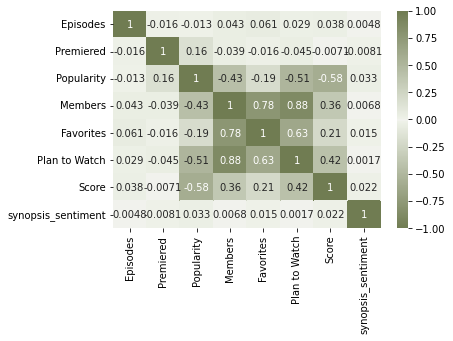

In [ ]:
# Take a closer look
sns.heatmap(anime.iloc[:,1:10].corr(),annot=True, vmin=-1,vmax=1, center = 0,cmap=sym_col)


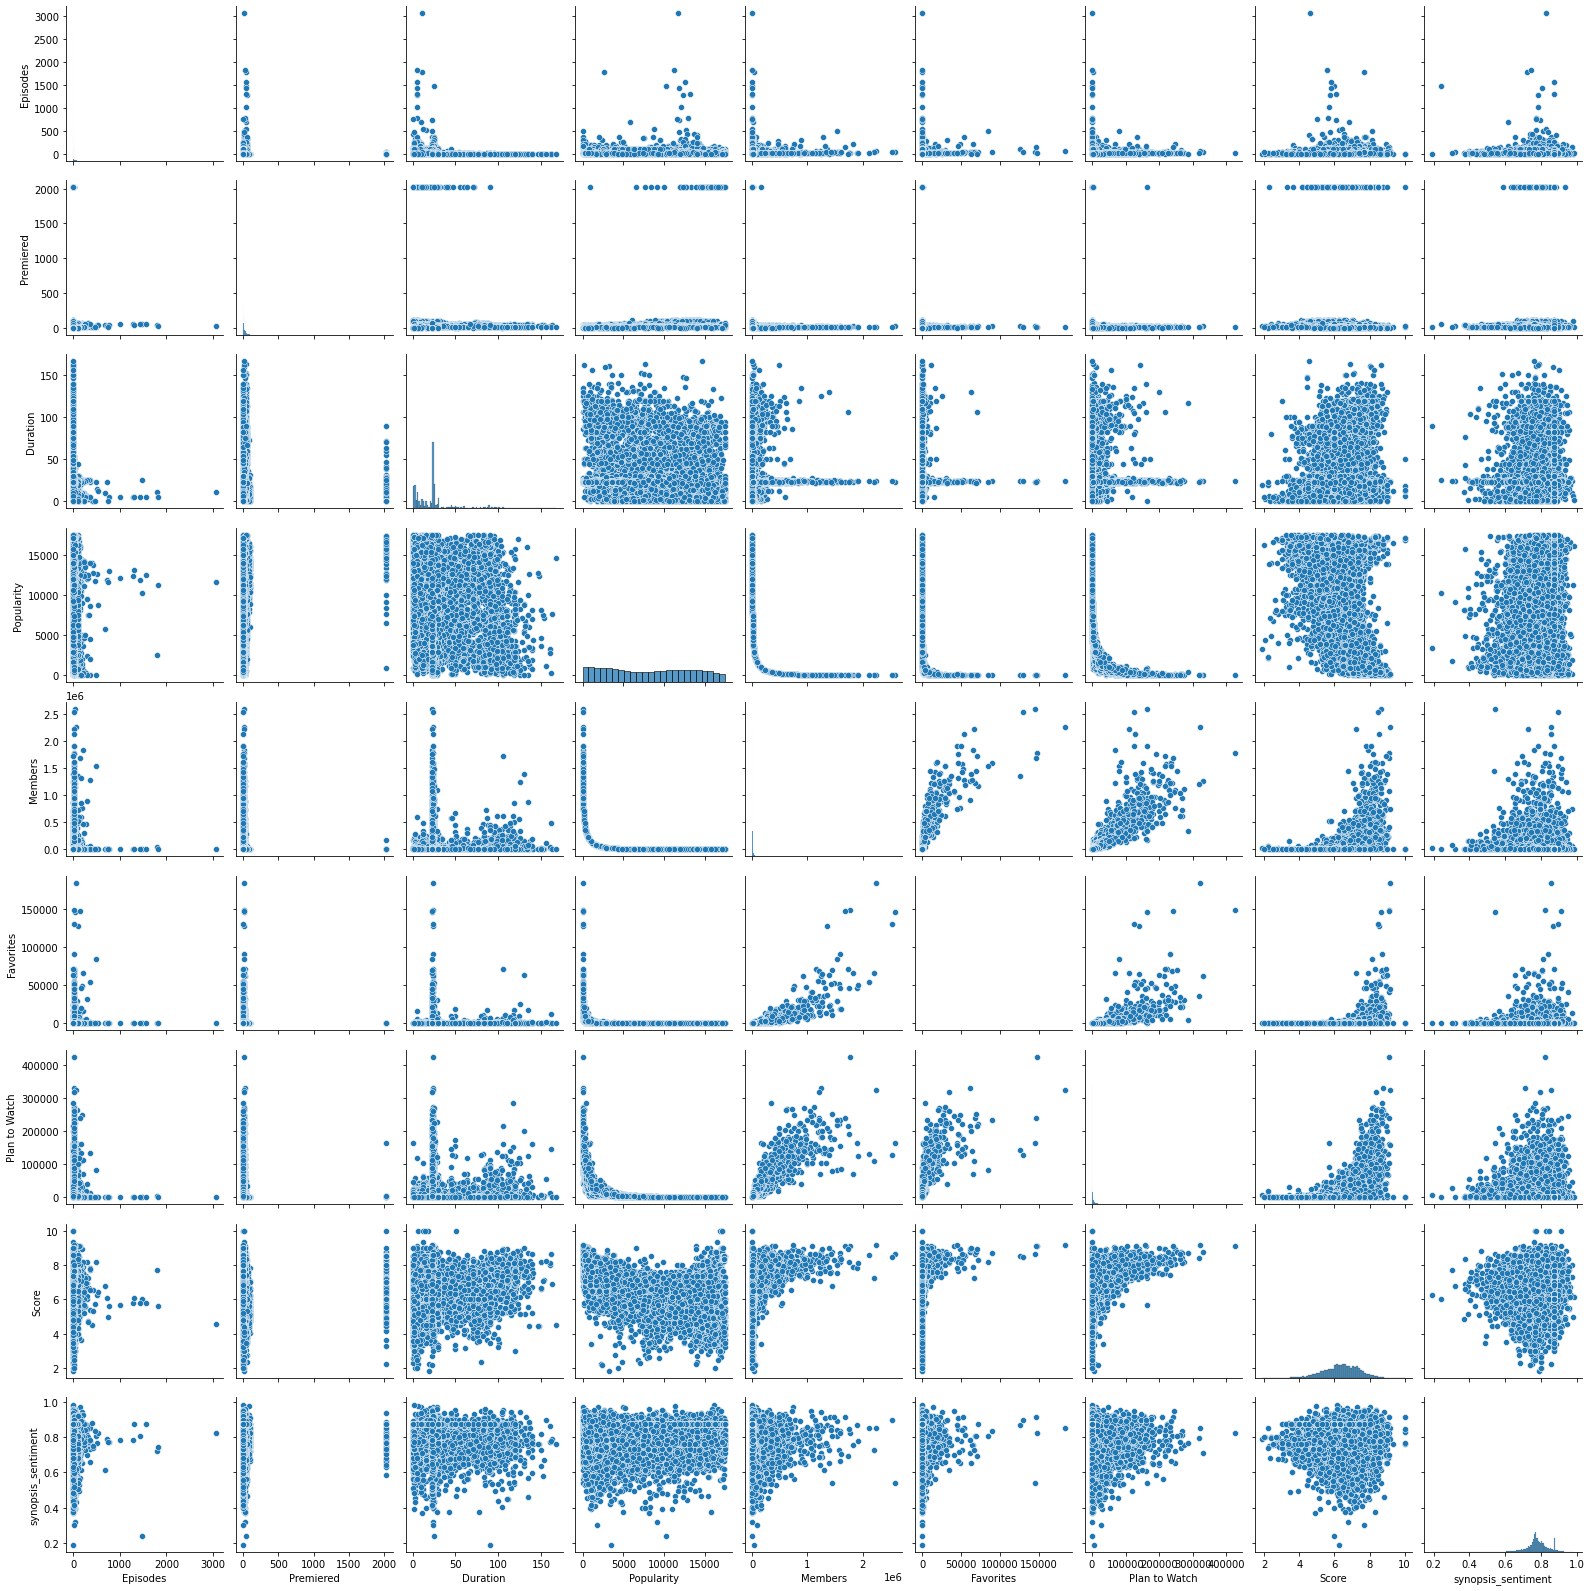

In [ ]:
# Pairplots of variables
sns.pairplot(anime.iloc[:,1:10])

#Modeling & Function

##Clustering

In [ ]:
# Load the Scalers and build dataframe for PCA
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

anime_pca = anime.drop(columns=['MAL_ID'])
anime_std = scaler_std.fit_transform(anime_pca)
anime_mm = scaler_mm.fit_transform(anime_pca)

pca = PCA()
pca_std = pca.fit(anime_std)
pca_mm = pca.fit(anime_mm)

###Standard Scaler

#### PCA

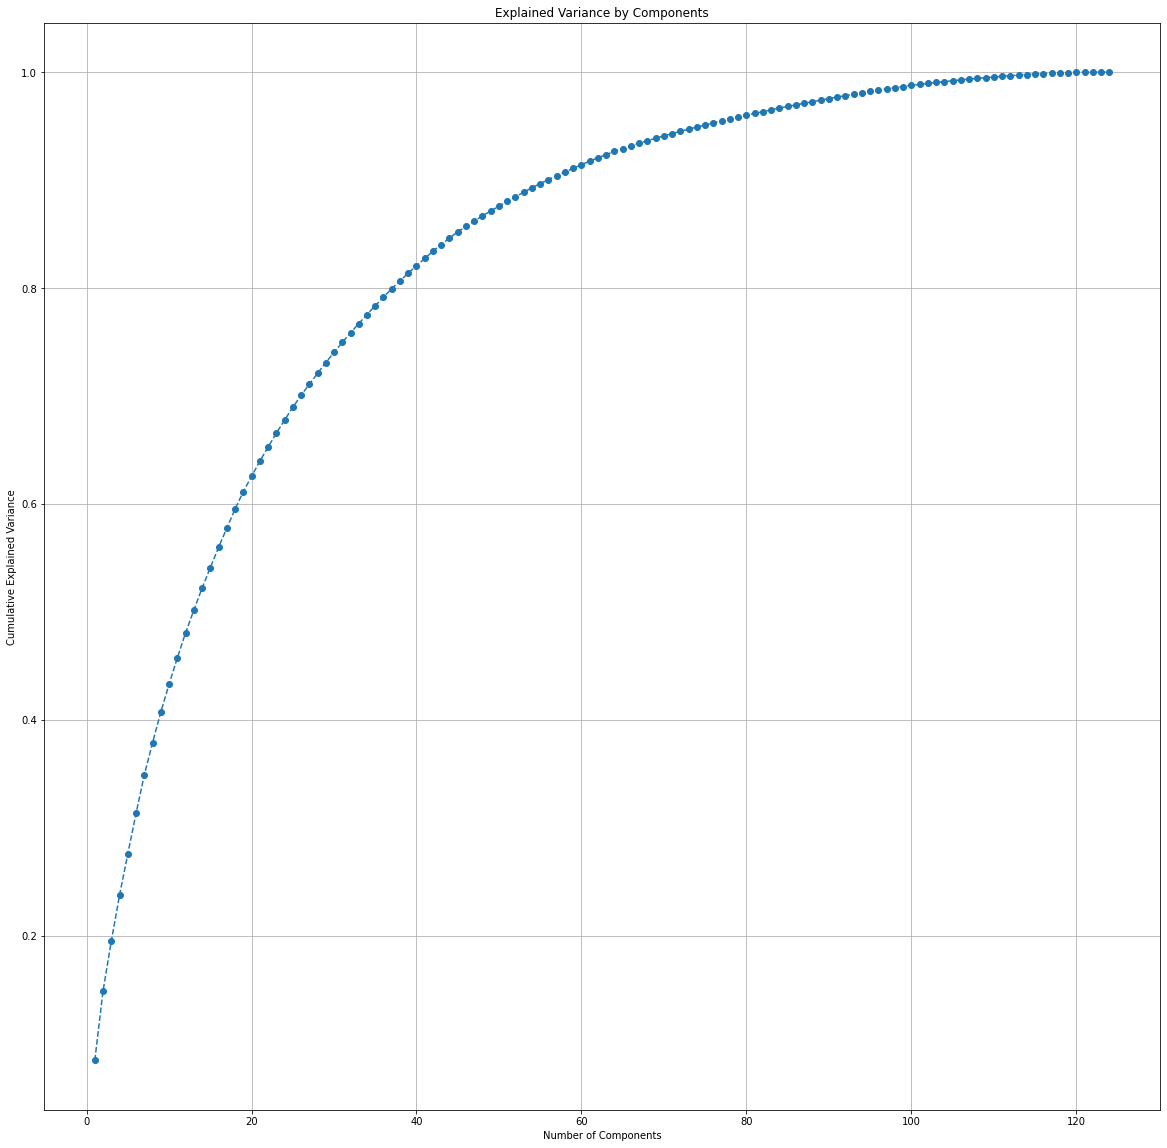

In [ ]:
# Check the Variance to choose the number of needed components
plt.figure(figsize=(20,20))
plt.plot(range(1,125),pca_std.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

## so we choose 37 as the amount of components 

In [ ]:
pca = PCA(n_components=37)
pca.fit(anime_std)
pca_scores_std = pca.transform(anime_std)
X_pca_std = pd.DataFrame(pca_scores_std)

####K-Means

In [ ]:
# Fit the KMeans Clustering model to check and choose best number of clusters
wcss_std = []
for i in range(1,36):
  km_pca_std = KMeans(n_clusters=i, init='k-means++', random_state=121)
  km_pca_std.fit(pca_scores_std)
  wcss_std.append(km_pca_std.inertia_)

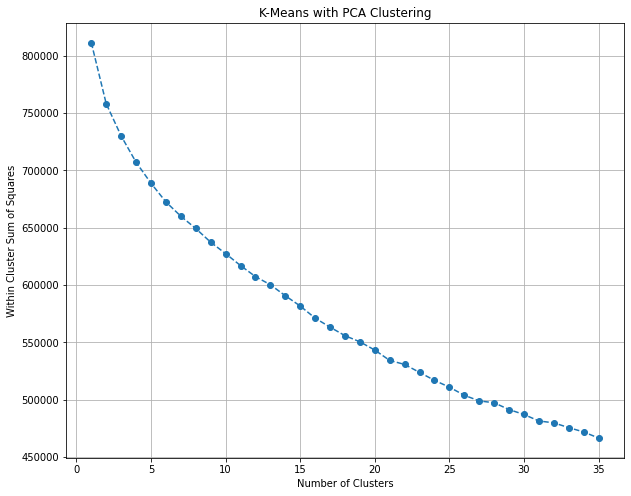

In [ ]:
# Plot it out
plt.figure(figsize=(10,8))
plt.plot(range(1,36),wcss_std, marker='o', linestyle='--')
plt.title('K-Means with PCA Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.grid()

## so we picked 4 as the cluster number

In [ ]:
# Fit the model
km_pca_std = KMeans(n_clusters=4, init='k-means++', random_state=121)
km_pca_std.fit(pca_scores_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=121, tol=0.0001, verbose=0)

In [ ]:
# Append cluster each anime belong to back to the created dataframe
kmstd = pd.concat([anime.reset_index(drop=True),X_pca_std],axis=1)
name=[]
for i in range(37):
  name.append('New_Conponent_'+ str(i))
kmstd.columns.values[-37:] = name
kmstd['clusters'] = km_pca_std.labels_

# Check silhouette score
metrics.silhouette_score(X_pca_std, kmstd['clusters'])

0.09297820925368216

####DBScan

Text(0, 0.5, 'Epsilons')

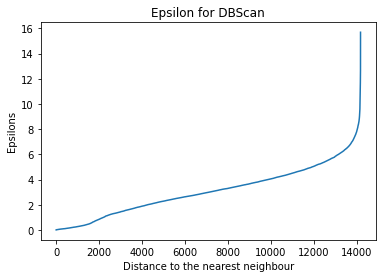

In [ ]:
# Generate distance to the nearest neighbour for each point
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_pca_std)
distances, indices = nbrs.kneighbors(X_pca_std)

# Now sort and plot to choose the optimal epislon
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(range(1,14185),distances)
plt.title('Epsilon for DBScan')
plt.xlabel('Distance to the nearest neighbour')
plt.ylabel('Epsilons')

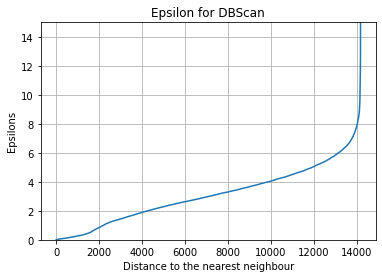

In [ ]:
# For a clearer and better view
plt.plot(distances)
plt.ylim(0, 15)

plt.title('Epsilon for DBScan')
plt.ylabel('Epsilons')
plt.xlabel('Distance to the nearest neighbour')
plt.grid(True)
## roughly at 8

In [ ]:
# Generate a DBScan model
dbs_std = DBSCAN(eps=8)
dbs_std.fit(X_pca_std)

DBSCAN(algorithm='auto', eps=8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
# Append cluster each anime belong to back to the created dataframe
dbstd = pd.concat([anime.reset_index(drop=True),pd.DataFrame(pca_scores_std)],axis=1)
name=[]
for i in range(37):
  name.append('New_Component_'+ str(i))
dbstd.columns.values[-37:] = name
dbstd['clusters'] = dbs_std.labels_

# Check the number of cluster and the silhouette score
print(dbstd['clusters'].nunique(), metrics.silhouette_score(X_pca_std, dbstd['clusters']), sep='\n\n')

4

0.34991786715465667


###Min Max Scaler


####PCA

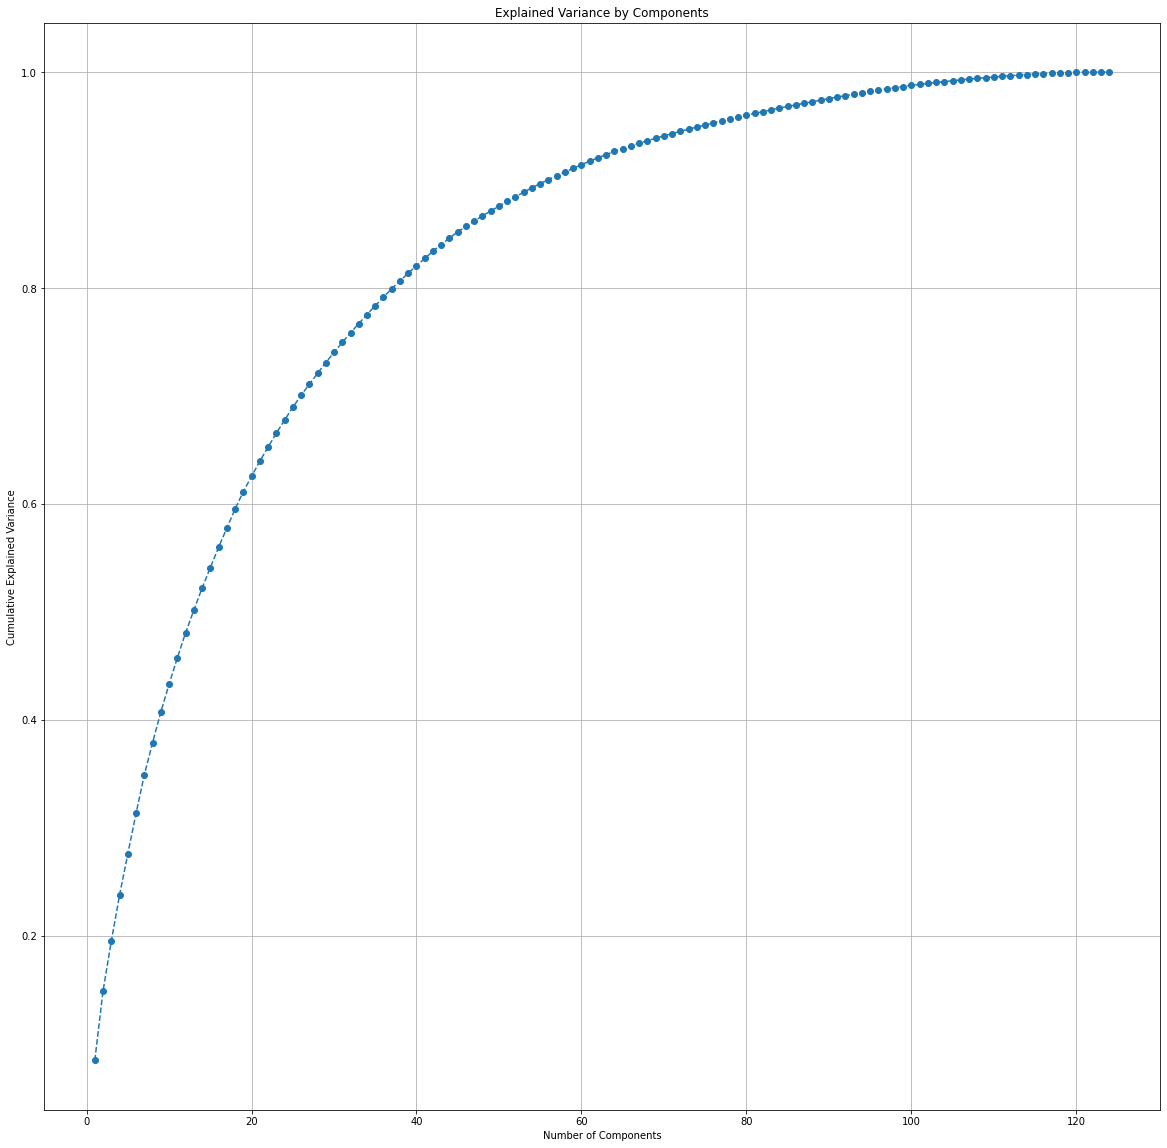

In [ ]:
# Check the Variance to choose the number of needed components
plt.figure(figsize=(20,20))
plt.plot(range(1,125),pca_mm.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

## so we choose 37 as the amount of components 

In [ ]:
pca_mm = PCA(n_components=37)
pca_mm.fit(anime_mm)
pca_scores_mm = pca.transform(anime_mm)
X_pca_mm = pd.DataFrame(pca_scores_mm)

####K-Means

In [ ]:
# Fit the KMeans Clustering model to check and choose best number of clusters
wcss_mm = []
for i in range(1,36):
  km_pca_mm = KMeans(n_clusters=i, init='k-means++', random_state=121)
  km_pca_mm.fit(pca_scores_mm)
  wcss_mm.append(km_pca_mm.inertia_)

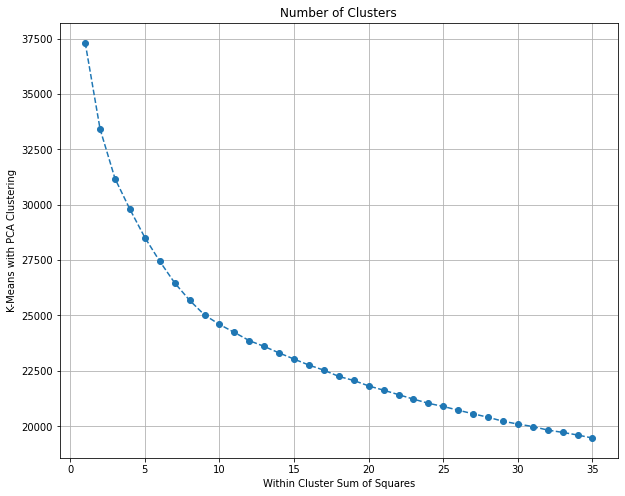

In [ ]:
# Plot it out
plt.figure(figsize=(10,8))
plt.plot(range(1,36),wcss_mm, marker='o', linestyle='--')
plt.title('Number of Clusters')
plt.xlabel('Within Cluster Sum of Squares')
plt.ylabel('K-Means with PCA Clustering')
plt.grid()

## so we picked 4 as the cluster number

In [ ]:
# Fit the model
km_pca_mm = KMeans(n_clusters=4, init='k-means++', random_state=121)
km_pca_mm.fit(pca_scores_mm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=121, tol=0.0001, verbose=0)

In [ ]:
# Append cluster each anime belong to back to the created dataframe
km_mm = pd.concat([anime.reset_index(drop=True),X_pca_mm],axis=1)
name=[]
for i in range(42):
  name.append(i)
km_mm.columns.values[-42:] = name
km_mm['clusters'] = km_pca_mm.labels_

# Check silhouette score
metrics.silhouette_score(X_pca_mm, km_mm['clusters'])

0.11694761306458025

####DBScan

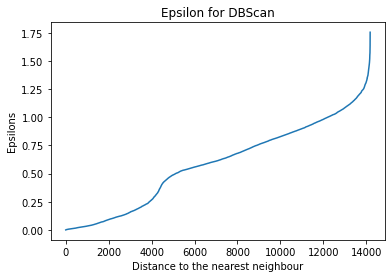

In [ ]:
# Generate distance to the nearest neighbour for each point
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_pca_mm)
distances, indices = nbrs.kneighbors(X_pca_mm)

# Now sort and plot to choose the optimal epislon
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.title('Epsilon for DBScan')
plt.ylabel('Epsilons')
plt.xlabel('Distance to the nearest neighbour')
plt.plot(distances)

Text(0.5, 0, 'Distance to the nearest neighbour')

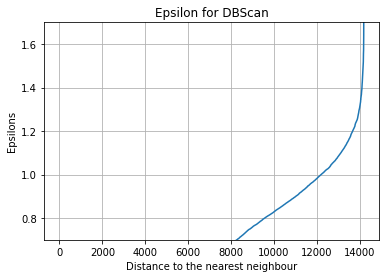

In [ ]:
# For a clearer and better view
plt.plot(distances)
plt.ylim(0.7, 1.7)
plt.grid(True)
plt.title('Epsilon for DBScan')
plt.ylabel('Epsilons')
plt.xlabel('Distance to the nearest neighbour')
## roughly at 1.2

In [ ]:
# Generate a DBScan model
dbs_mm = DBSCAN(eps=1.4)
dbs_mm.fit(X_pca_mm)

DBSCAN(algorithm='auto', eps=1.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
# Append cluster each anime belong to back to the created dataframe
dbmm = pd.concat([anime.reset_index(drop=True),pd.DataFrame(pca_scores_mm)],axis=1)
name=[]
for i in range(42):
  name.append('New_Component_'+ str(i))
dbmm.columns.values[-42:] = name
dbmm['clusters'] = dbs_mm.labels_

# Check the number of cluster and the silhouette score
print(dbmm['clusters'].nunique(), metrics.silhouette_score(X_pca_mm, dbmm['clusters']), sep='\n\n')

4

0.17193708395114832


##Linear Regression

In [ ]:
# Use the created new dataframe to build linear regression
anime_lr = X_pca_std.join(anime['MAL_ID'])
anime_lr.set_index('MAL_ID',inplace=True)
anime_lr.head()

0         1         2   ...        34        35        36
MAL_ID                                 ...                              
1       16.167940  6.580072  1.825070  ...  1.102237 -0.640704 -1.513854
5        4.412774  4.233970  1.887799  ...  1.244332  2.002039 -0.066563
6        6.592892  1.749710  1.592960  ... -2.462413  0.521645 -0.252506
7        3.492534  2.088738  1.220386  ... -1.704866  0.086203 -0.656882
8        1.205560  0.458387  2.217760  ...  0.436660 -0.261921  0.336668

[5 rows x 37 columns]

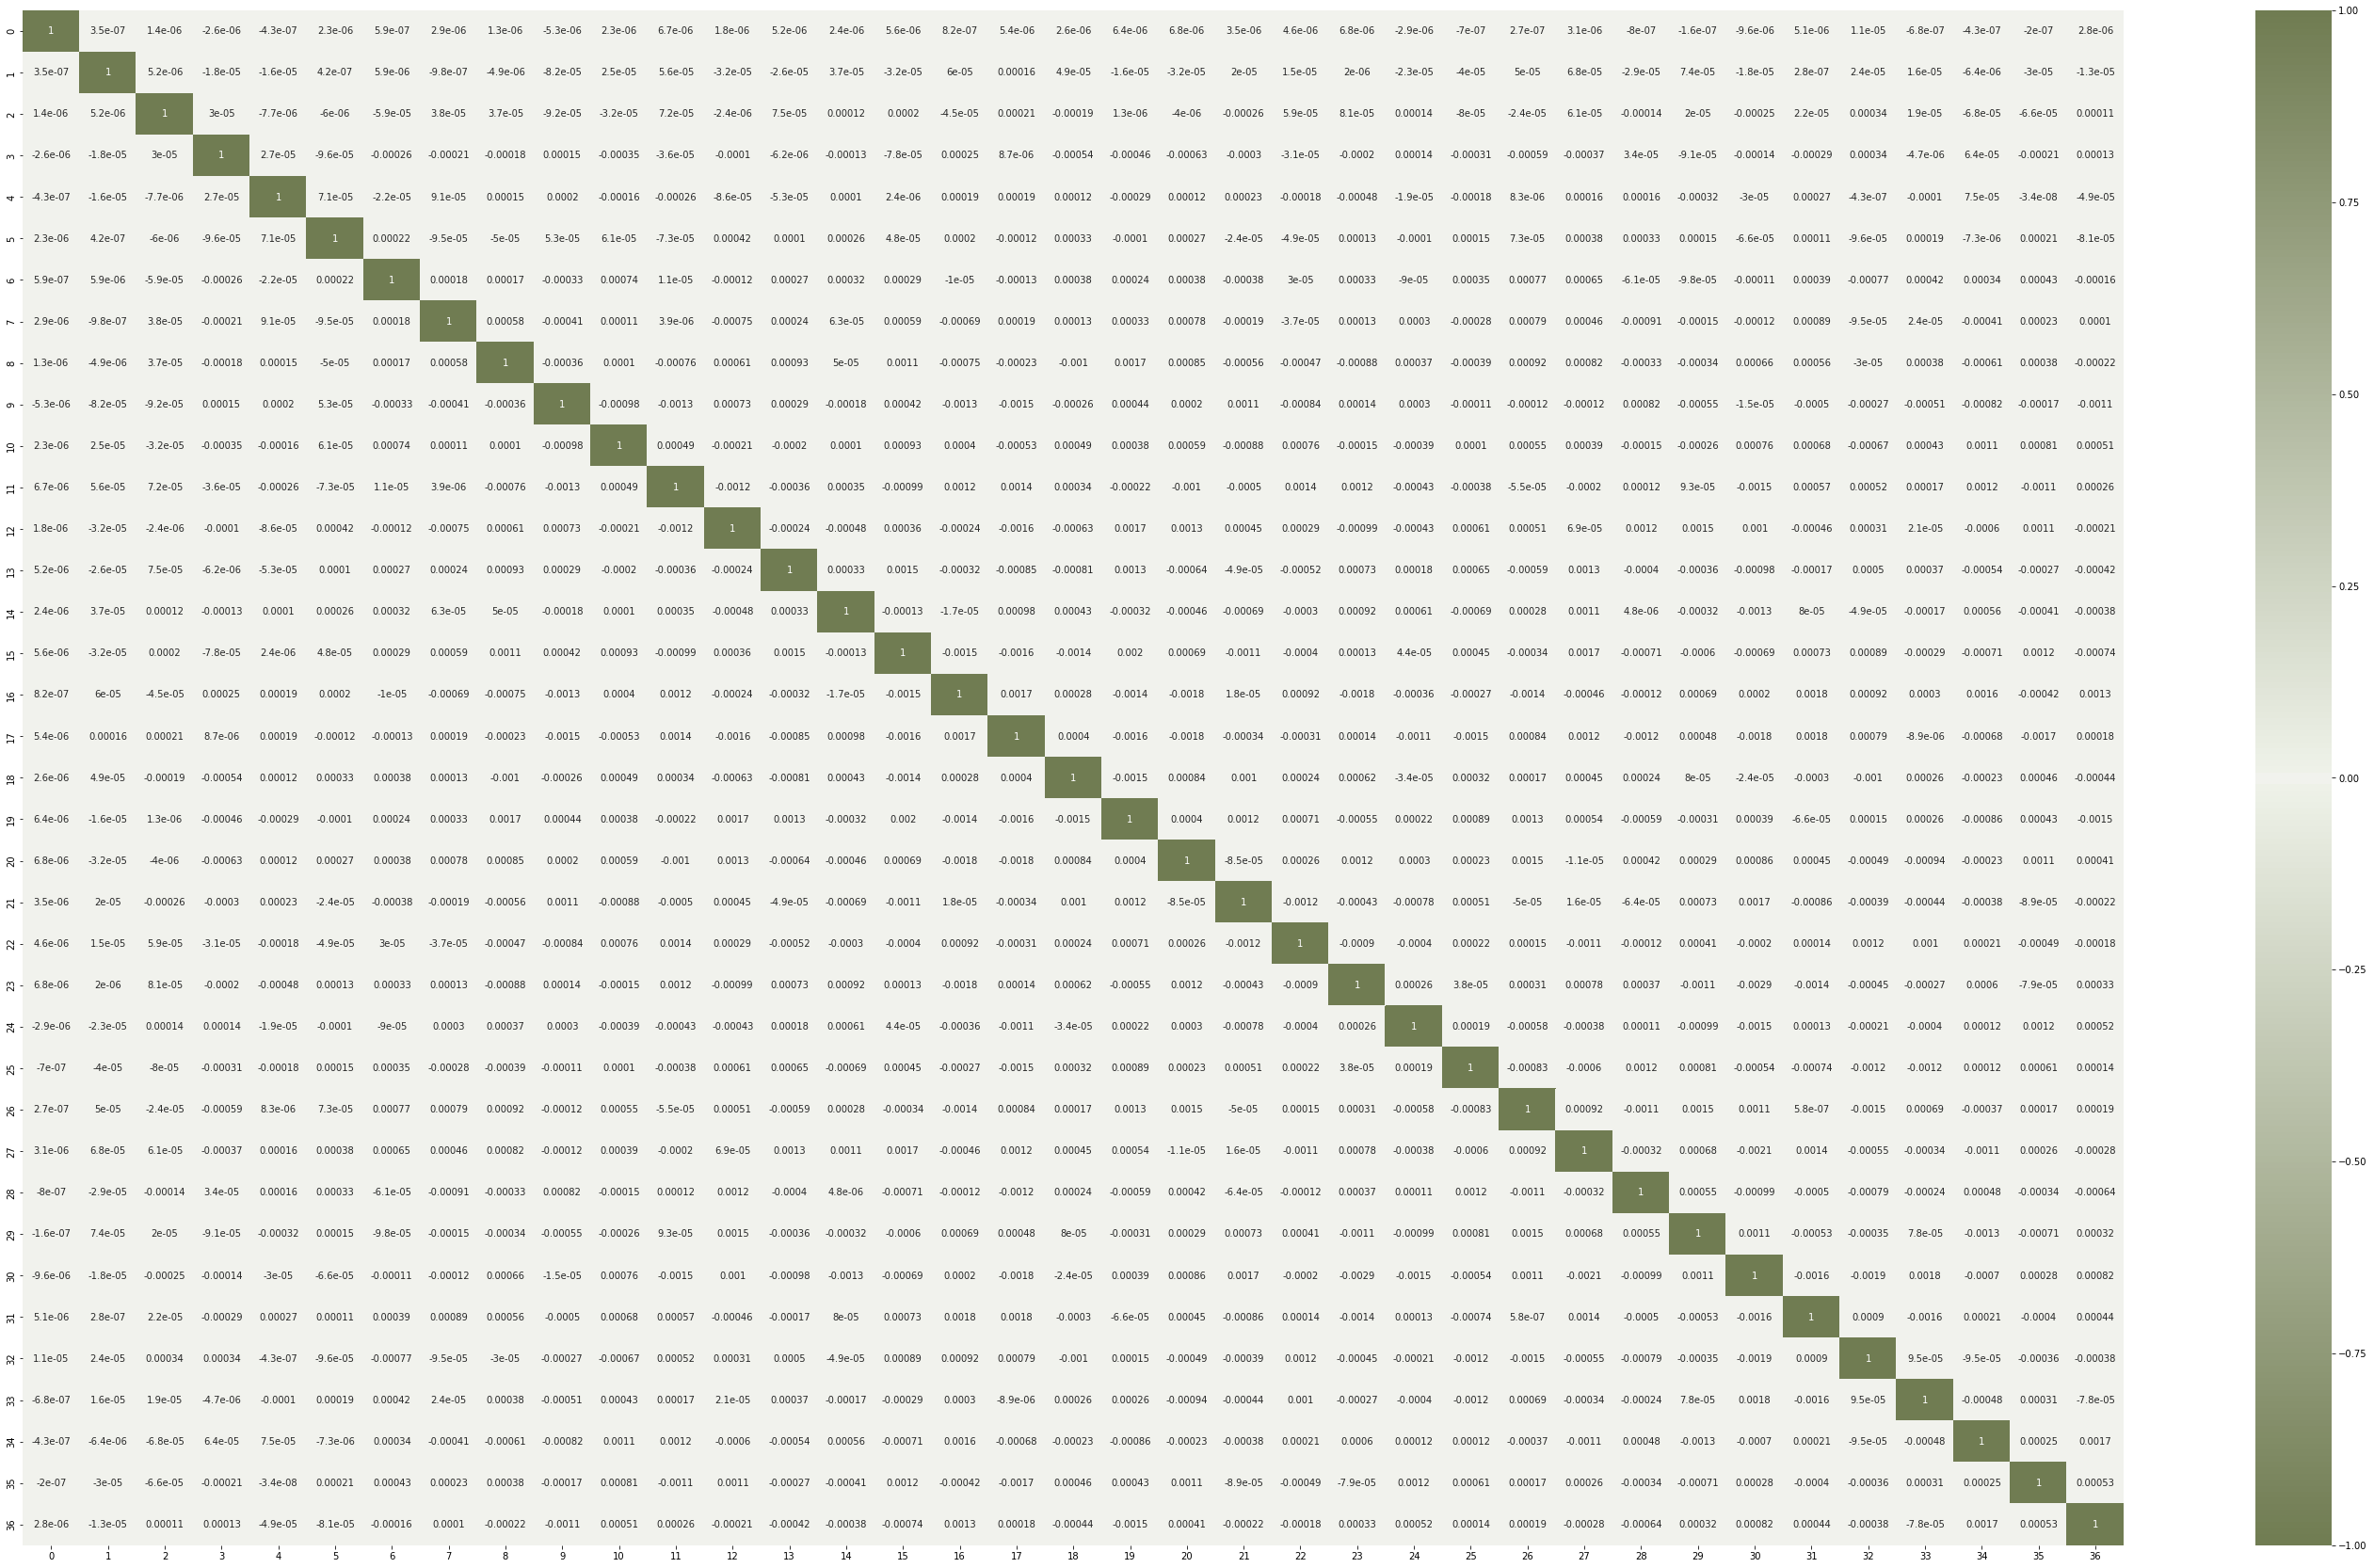

In [ ]:
# Heatmap of column correlations
sym_col = sns.diverging_palette(100, 100, s=50, as_cmap=True)

plt.figure(figsize=(50,30))
sns.heatmap(anime_lr.corr(),annot=True, vmin=-1,vmax=1, center = 0,cmap=sym_col)
plt.show()

In [ ]:
# Filter out the anime entries not included in the anime dataset
rating = rating[rating['anime_id'].isin(list(anime['MAL_ID']))]
rating.reset_index(drop=True, inplace=True)
rating.rename(columns={'anime_id':'MAL_ID'}, inplace=True)
rating.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(56342507, 3)

In [ ]:
# Check how many individual users
user_rates = pd.DataFrame(rating.user_id.value_counts())
user_rates.columns = ['rates']
user_rates

###Overall Model

In [ ]:
# However there are users who watched under 100 animes
# so we need to build an average linear regression model for these
# otherwise, the final function will take in individul anime to build

y = rating.groupby(['MAL_ID']).mean().drop(columns=['user_id'])
X = anime_lr[anime_lr.index.isin(y.index)]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(11265, 38) (11265, 1) (2817, 38) (2817, 1)


In [ ]:
# Build the OLS model on stats model
lin_reg = sm.OLS(y_train, X_train)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     494.4
Date:                Sat, 06 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:39:35   Log-Likelihood:                -11728.
No. Observations:               11265   AIC:                         2.353e+04
Df Residuals:                   11227   BIC:                         2.381e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3221      0.006    977.102      0.000       6.309       6.335
0              0.2979      0.003    110.000      0.000       0.293       0.303
1              0.0434      0.004     12.183      0.000       0.036       0.050
2              0.0595      0.004     14.534      0.000       0.051       0.067
3             -0.1557      0.004    -35.834      0.000      -0.164      -0.147
4              0.1163      0.005     25.806      0.000       0.107       0.125
5              0.0648      0.005     14.296      0.000       0.056       0.074
6             -0.0163      0.005     -3.497      0.000      -0.025      -0.007
7              0.0955      0.005     19.673      0.000       0.086       0.105
8             -0.0004      0.005     -0.089      0.929      -0.010       0.009
9             -0.0639      0.005    -12.552      0.000      -0.074      -0.054
10             0.0461      0.005      9.024      0.000       0.036       0.056
11            -0.1850      0.005    -35.488      0.000      -0.195      -0.175
12             0.0891      0.005     16.586      0.000       0.079       0.100
13            -0.0436      0.005     -8.034      0.000      -0.054      -0.033
14            -0.0352      0.006     -6.238      0.000      -0.046      -0.024
15            -0.0156      0.006     -2.781      0.005      -0.027      -0.005
16            -0.1162      0.006    -20.478      0.000      -0.127      -0.105
17            -0.0281      0.006     -4.920      0.000      -0.039      -0.017
18             0.0136      0.006      2.358      0.018       0.002       0.025
19            -0.0182      0.006     -3.088      0.002      -0.030      -0.007
20             0.0166      0.006      2.822      0.005       0.005       0.028
21            -0.0962      0.006    -16.126      0.000      -0.108      -0.084
22            -0.0163      0.006     -2.716      0.007      -0.028      -0.005
23            -0.0120      0.006     -2.002      0.045      -0.024      -0.000
24            -0.0259      0.006     -4.245      0.000      -0.038      -0.014
25             0.0442      0.006      7.262      0.000       0.032       0.056
26             0.0431      0.006      7.051      0.000       0.031       0.055
27            -0.0445      0.006     -7.268      0.000      -0.057      -0.033
28            -0.0469      0.006     -7.594      0.000      -0.059      -0.035
29            -0.0995      0.006    -15.987      0.000      -0.112      -0.087
30            -0.0152      0.006     -2.427      0.015      -0.027      -0.003
31             0.0327      0.006      5.232      0.000       0.020       0.045
32             0.0089      0.006      1.402      0.161      -0.004       0.021
33             0.0009      0.006      0.149      0.882      -0.011       0.013
34             0.0297      0.006      4.650      0.000       0.017       0.042
35

In [ ]:
# Add a prediction column that shows the model predicted values and print RMSE
X_train['y_pred'] = results.predict(X_train)
np.math.sqrt(metrics.mean_squared_error(y_train, X_train['y_pred']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.685313473085886

In [ ]:
# Now we predict using the X_test set
X_test['y_pred'] = results.predict(X_test)
np.math.sqrt(metrics.mean_squared_error(y_test, X_test['y_pred']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.6922746659162111

In [ ]:
# Look for the Hex code for colour scheme consistency
sym_col = sns.diverging_palette(100, 100, s=50, as_cmap=False)
sns.color_palette(sym_col).as_hex()[0]

'#707c52'

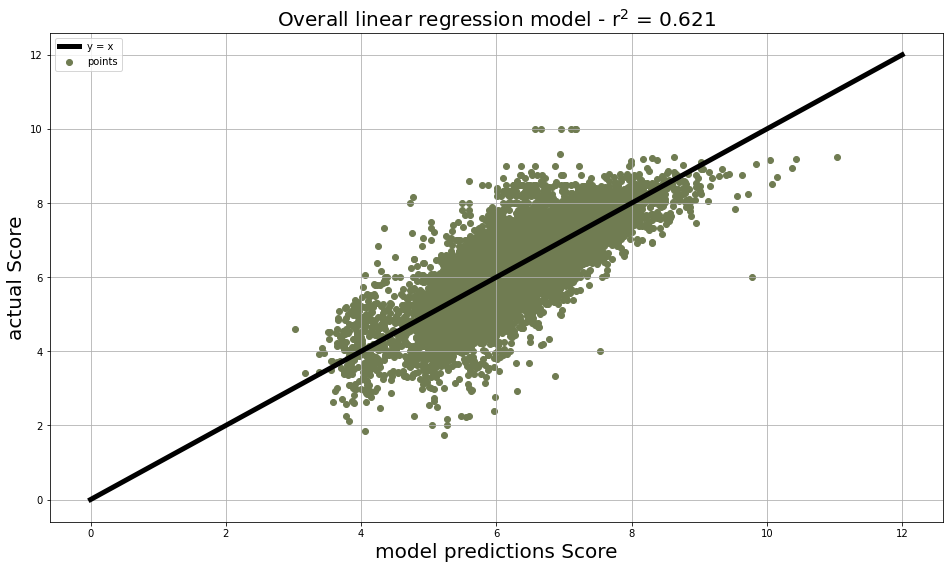

In [ ]:
# Plot a graph to show model prediction on the test dataset
predicted = X_train['y_pred']
actual  = y_train
max_accuracy_price = 12

plt.figure(figsize=(16,9)) 
plt.xlabel('model predictions Score', fontsize = 20) 
plt.ylabel('actual Score', fontsize = 20)  
plt.plot(np.linspace(0,max_accuracy_price,1000),np.linspace(0,max_accuracy_price,1000),color='black',linewidth=5) 
plt.scatter(x=predicted,y=actual,color='#707c52') 
plt.legend(['y = x','points'])

plt.title('Overall linear regression model - r$^2$ = 0.621', fontsize = 20)
plt.grid()
plt.show()

###Individual Model Function

In [ ]:
# Create a function which can generate a seperated dataframe only consisting the ratings each user made
anime_lr1 = anime_lr.reset_index()
def individual_rating(n):
  x = rating[rating['user_id']==n]
  y = list(x['MAL_ID'])
  z = anime_lr1[anime_lr1['MAL_ID'].isin(y)]

  df = x.merge(z, on='MAL_ID').drop(columns=['user_id']).set_index('MAL_ID')
  return df

individual_rating(189037).iloc[:,1:38]
## same as above so the function works

In [ ]:
# However there are users who watched under 100 animes
# we will apply the overall model for them
def individual_lr(n):
  X = individual_rating(n).iloc[:,1:38]
  X = sm.add_constant(X)
  y = individual_rating(n)['rating']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

  lin_reg = sm.OLS(y_train, X_train)
  results = lin_reg.fit()
  return results

In [ ]:
# Create a linear model function
def pred(n):
  if user_rates['rates'][n] < 100:
    return results
  else:
    if individual_lr(n).rsquared < results.rsquared:
      return results
    else:
      return individual_lr(n)

##Final Function

In [ ]:
def anime_rec(profile):
    """ Produce a list of anime recommendations

    Parameters
    ----------
    profile : int
        A interger representing each individual on MyAnimeList database

    Procedure
    ---------
        1. Create an empty list for clustering; a list of the individual's favourite anime and a anime dataframe with the PCA components
        
        2. If the individuals rates more than 10 anime, the favourite list returns the highest 10% rated anime

        3. Run a for loop to return a list of the clusters the anime in the favourite list belong to
        
        4. Create a prediction list of anime that is in the mode cluster (of the favourite list)

        5. Predict how would the individual score the anime in prediction list
        
        6. Return the anime list of 5 highest rating anime recommendations

    Returns
    -------
    A lst of 5 anime recommendations
    """  
    to_cluster = []
    fav = list(individual_rating(profile).sort_values(by='rating', ascending=False).index)
    clu = anime_lr1.merge(dbstd.iloc[:,[0,-1]],on='MAL_ID').set_index('MAL_ID')

    if user_rates['rates'][profile] > 10:
      fav = fav[0:round(len(fav)/10)]

    for i in fav:
      to_cluster.append(clu['clusters'][i])

    mod = max(set(to_cluster), key = to_cluster.count)
    to_predict = clu.loc[clu['clusters'] == mod].iloc[:,0:-1]
    to_predict = to_predict[to_predict.index.isin(individual_rating(profile).index)==False]

    to_predict['prediction'] = pred(profile).predict(sm.add_constant(to_predict))
    to_recommend = list(to_predict.sort_values(by='prediction', ascending=False).index)[0:5]
    recommend = animeII['Name'][animeII['MAL_ID'].isin(to_recommend)]
    return mod